#**Handwritten Digit Recognition**

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2     # Computer vision
import os

In [2]:
# To get the dataset
mnist = tf.keras.datasets.mnist

In [3]:
# X data -> Image
# Y data -> digit
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Show the first training example
print(f"Training sample: \n{x_train[0]}\n")
print(f"Training label: {y_train[0]}")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 

In [5]:
# Check the shape of our data
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
# Check shape of a single example
x_train[0].shape,x_test[0].shape

((28, 28), (28, 28))

We have 60,000 training examples each with shape (28, 28) and a label each

As well as 10,000 test examples of shape (28, 28).

3

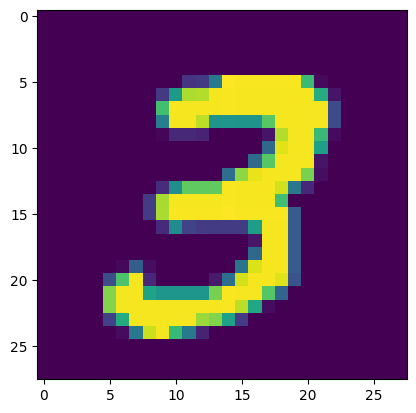

In [7]:
# Plot a single example just to visualize
import matplotlib.pyplot as plt
plt.imshow(x_train[7]);
y_train[7]

In [8]:
# Check the minimum and maximum values of the training data
x_train.min(),x_train.max()

(0, 255)

Neural Networks prefer numbers between 0 and 1 But now our data isn't between 0 and 1, in other words it's not normalized and It's pixel values are between 0 and 255.

It's better to perform Normalization/Feature Scaling So, that we can get these values between 0 and 1 by dividing the entire array by the maximum: 255.0 (dividing by a float also converts to a float).



In [9]:
# Divide train and test images by the maximum value (normalize it)
x_train = x_train / 255.0
x_test = x_test / 255.0
# Check the min and max values of the training data
x_train.min(),x_train.max()

(0.0, 1.0)

In [10]:
#The other way to normalize
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [11]:
# Set random seed
tf.random.set_seed(42)
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax') # number of output layers
])
# Compile the model
model.compile(loss = "SparseCategoricalCrossentropy",
              optimizer = "Adam",
              metrics = ["accuracy"])
# Fit the model
hist = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2642 - accuracy: 0.9235
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1095 - accuracy: 0.9658
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0749 - accuracy: 0.9771
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0551 - accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0415 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0347 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0263 - accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0211 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0187 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - los

In [12]:
# Save the model
model.save('handwritten.model')

In [13]:
model = tf.keras.models.load_model('handwritten.model')

In [14]:
# Evaluate the model
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0866 - accuracy: 0.9777


[0.08663030713796616, 0.9776999950408936]